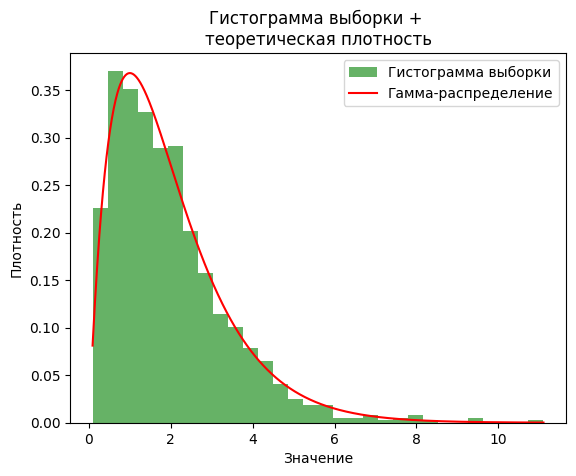

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import random
import math

shape_param = 2.0
scale_param = 1.0

def gamma_distribution(shape, scale=1.0, size=None): #функция для гамма-распределения

    def single_gamma(k, theta):

        if k < 1:
            k += 1
            uniform = random.uniform(0, 1)
            return single_gamma(k, theta) * uniform ** (1 / shape)

        d = k - 1 / 3
        c = 1 / math.sqrt(9 * d)

        while True:
            x = random.gauss(0, 1)
            v = (1 + c * x) ** 3

            if v > 0:
                u = random.uniform(0, 1)
                if u < 1 - 0.0331 * (x ** 4):
                    return d * v * theta
                if math.log(u) < 0.5 * x ** 2 + d * (1 - v + math.log(v)):
                    return d * v * theta

    if size is None:
        return single_gamma(shape, scale)
    else:
        return [single_gamma(shape, scale) for _ in range(size)]



def norm(x, mean=0.0, stddev=1.0): #функция для нормального распределения

    variance = stddev ** 2
    exponent = -((x - mean) ** 2) / (2 * variance)

    return (1 / (math.sqrt(2 * math.pi * variance))) * math.exp(exponent)

sample_size = 1000

#генерация выборки
gamma_sample = gamma_distribution(shape_param, scale_param, sample_size)

# Построение гистограммы выборки
plt.hist(gamma_sample, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

#построение теоретической плотности распределения случайной величины
x = np.linspace(min(gamma_sample), max(gamma_sample), 1000)
gamma_pdf = stats.gamma.pdf(x, shape_param, scale=scale_param)
plt.plot(x, gamma_pdf, 'r', label='Гамма-распределение')
plt.title('Гистограмма выборки + \nтеоретическая плотность')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

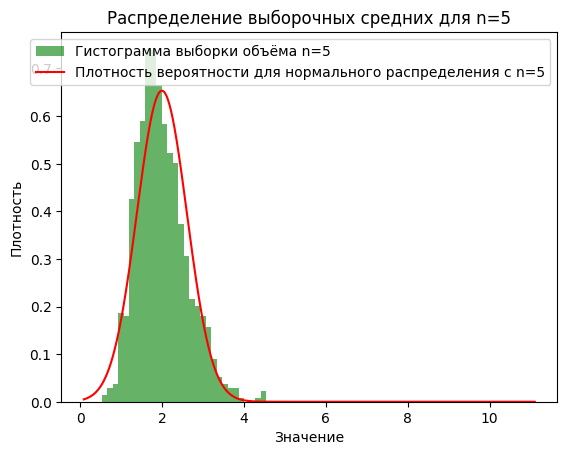

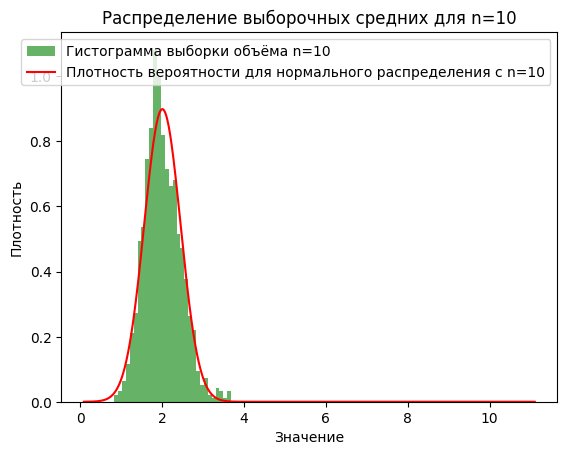

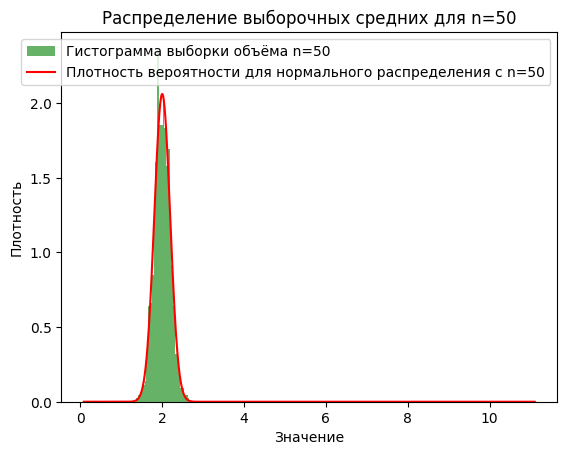

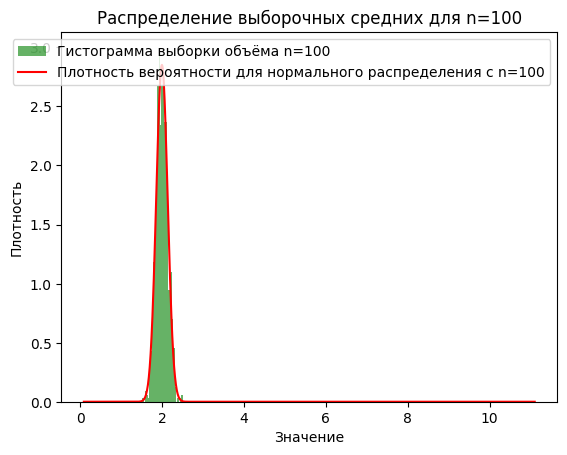

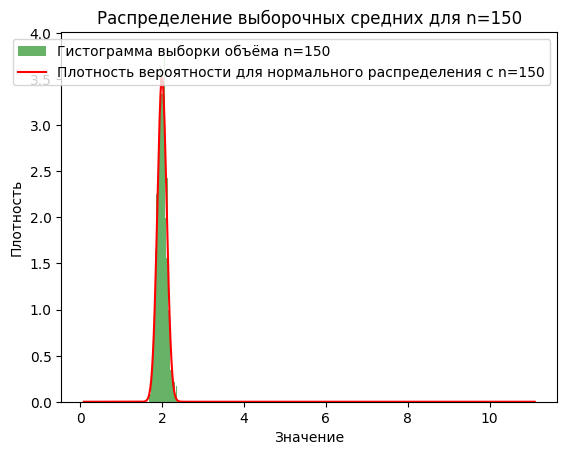

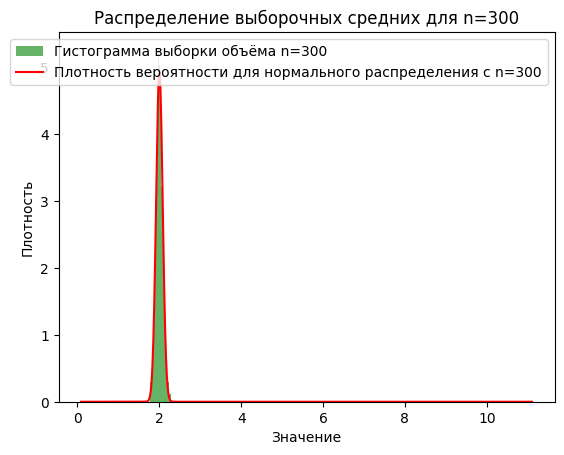

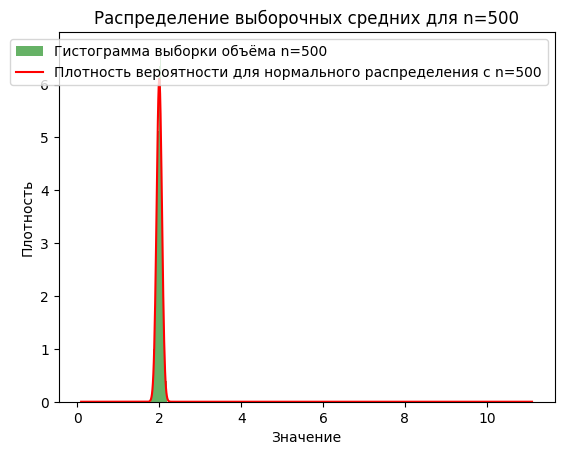

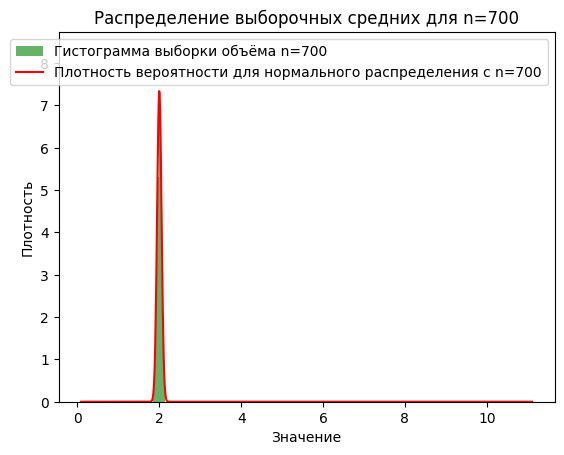

{5: (1.9959449002679384, 0.6106591141551453), 10: (2.0078658845836626, 0.4438615935152338), 50: (2.0037188270867277, 0.1935273893033863), 100: (1.9968676219801123, 0.13990093848334062), 150: (1.9988934779206575, 0.11353912553558729), 300: (2.00094894775445, 0.08065965901176923), 500: (1.998144808337564, 0.06526977005794508), 700: (1.9993263622075648, 0.054315286320231505)}


In [3]:


n_values = [5, 10, 50, 100, 150, 300, 500, 700]
num_samples = 1000

#для хранения данных по выборочным средним
mean_distributions = {}

#генерация выборок и расчет выборочных средних
for n in n_values:

    means = [np.mean(gamma_distribution(shape_param, scale_param, n)) for _ in range(num_samples)]
    mean_distributions[n] = means

#построение гистограмм выборочных средних и нормальных распределений
for n in n_values:

    plt.hist(mean_distributions[n], bins=30, density=True, alpha=0.6, color='g', label=f'Гистограмма выборки объёма n={n}')
    means1 = np.mean(mean_distributions[n])
    std = np.std(mean_distributions[n], ddof=1)
    normal_dist = []
    for i in x:
        normal_dist.append (norm(i, means1, std))
    plt.plot(x, normal_dist, 'r', label=f'Плотность вероятности для нормального распределения с n={n}')

    plt.title(f'Распределение выборочных средних для n={n}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()


#вывод параметров нормального распределния
parametry = {n: (np.mean(mean_distributions[n]), np.std(mean_distributions[n], ddof=1)) for n in n_values}
parametry_df = pd.DataFrame(parametry, index=['Среднее', 'Стандартное отклонение']).T
print(parametry)